In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler #,Imputer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

from sklearn.feature_selection import f_classif, f_regression

from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn import utils

from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split

import scipy.stats as stats 

from sklearn.preprocessing import FunctionTransformer, PowerTransformer 

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import RobustScaler

import xgboost as xgb

from sklearn.model_selection import learning_curve

from sklearn.decomposition import PCA

In [5]:
data = pd.read_excel('ffeebb.xlsx')
data.head()

,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDRS511 2,Surface Temperature (°C) \nDSC/DST,Air Temperature (°C) \nAtmospheric site,Dew Point Temperature (°C) \nAtmospheric site,Level of grip \nDSC/DST,Water Layer (mm) \nDSC/DST,Ice Layer (mm) \nDSC/DST,Snow layer (water equivalent) (mm) \nDSC/DST,Relative Humidity (%) \nAtmospheric site,...,Base Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 2,Ground Temperature (°C) \nDRS511 1,Ground Temperature (°C) \nDRS511 2,Freezing Temperature (°C) \nDRS511 1,Freezing Temperature (°C) \nDRS511 2,Max Wind Speed (m/s) \nAtmospheric site,Water Thickness (mm) \nDRS511 1,Water Thickness (mm) \nDRS511 2
0,-3.7,-3.7,-3.8,-2.6,-4.3,0.8,0.09,0.0,0.0,88,...,-3.2,-0.3,-1.6,-3.7,-3.8,-0.8,-1.6,4.8,0.09,0.0
1,-3.7,-3.7,-3.8,-2.5,-4.2,0.8,0.09,0.0,0.0,88,...,-3.3,-0.3,-1.6,-3.7,-3.8,-0.8,-1.6,4.5,0.09,0.0
2,-3.6,-3.6,-3.8,-2.5,-4.1,0.8,0.09,0.0,0.0,89,...,-3.3,-0.3,-1.6,-3.7,-3.7,-0.8,-1.6,4.0,0.09,0.0
3,-3.4,-3.5,-3.6,-2.4,-4.0,0.8,0.09,0.0,0.0,88,...,-3.3,-0.3,-1.5,-3.7,-3.7,-0.8,-1.5,4.1,0.09,0.0
4,-3.5,-3.5,-3.6,-2.3,-3.9,0.8,0.09,0.0,0.0,89,...,-3.3,-0.3,-1.5,-3.6,-3.7,-0.8,-1.5,3.6,0.09,0.0


In [6]:
data.shape

(3847, 34)

In [7]:
data.describe()

,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDRS511 2,Surface Temperature (°C) \nDSC/DST,Air Temperature (°C) \nAtmospheric site,Dew Point Temperature (°C) \nAtmospheric site,Level of grip \nDSC/DST,Water Layer (mm) \nDSC/DST,Ice Layer (mm) \nDSC/DST,Snow layer (water equivalent) (mm) \nDSC/DST,Relative Humidity (%) \nAtmospheric site,...,Base Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 2,Ground Temperature (°C) \nDRS511 1,Ground Temperature (°C) \nDRS511 2,Freezing Temperature (°C) \nDRS511 1,Freezing Temperature (°C) \nDRS511 2,Max Wind Speed (m/s) \nAtmospheric site,Water Thickness (mm) \nDRS511 1,Water Thickness (mm) \nDRS511 2
count,3845.000000,3845.000000,3845.000000,3847.000000,3847.000000,3845.000000,3845.000000,3845.000000,3845.000000,3847.000000,...,3847.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3831.000000,3845.000000,3845.000000
mean,0.606580,0.686138,0.231651,0.813257,-2.404887,0.749873,0.080902,0.018770,0.037446,80.541981,...,-0.040915,-0.218674,-0.753186,0.596281,0.572380,-0.462939,-0.925358,5.775516,0.059555,0.045756
std,4.626706,4.716544,4.273792,4.978134,4.876419,0.148853,0.120461,0.059503,0.146344,14.187704,...,2.076323,0.480000,1.313025,3.758605,3.695203,1.523765,1.861890,2.637707,0.134859,0.222017
min,-14.600000,-14.500000,-14.200000,-20.000000,-21.900000,0.110000,0.000000,0.000000,0.000000,39.000000,...,-4.600000,-8.300000,-21.100000,-11.300000,-11.300000,-21.100000,-21.100000,0.500000,0.000000,0.000000
25%,-1.500000,-1.500000,-1.500000,-0.900000,-4.200000,0.780000,0.000000,0.000000,0.000000,71.000000,...,-1.500000,-0.300000,-1.000000,-1.200000,-1.200000,-0.500000,-1.100000,3.700000,0.000000,0.000000
50%,1.100000,1.000000,0.700000,1.900000,-0.900000,0.810000,0.050000,0.000000,0.000000,85.000000,...,-0.100000,-0.100000,-0.400000,0.800000,0.800000,-0.100000,-0.500000,5.700000,0.030000,0.000000
75%,3.300000,3.400000,2.700000,3.800000,1.200000,0.820000,0.110000,0.000000,0.000000,91.000000,...,1.400000,0.000000,-0.100000,3.000000,2.900000,0.000000,-0.100000,7.600000,0.060000,0.010000
max,14.200000,15.200000,11.200000,10.400000,3.700000,0.820000,1.810000,0.510000,1.040000,99.000000,...,4.600000,0.000000,0.000000,10.300000,10.200000,0.000000,0.000000,15.400000,1.880000,3.100000


In [10]:
#

In [24]:
data.columns

Index(['Surface Temperature (°C) \nDRS511 1',
       'Surface Temperature (°C) \nDRS511 2',
       'Surface Temperature (°C) \nDSC/DST',
       'Air Temperature (°C) \nAtmospheric site',
       'Dew Point Temperature (°C) \nAtmospheric site',
       'Level of grip \nDSC/DST', 'Water Layer (mm) \nDSC/DST',
       'Ice Layer (mm) \nDSC/DST',
       'Snow layer (water equivalent) (mm) \nDSC/DST',
       'Relative Humidity (%) \nAtmospheric site',
       'Rain Intensity (mm/h) \nAtmospheric site',
       'Wind Speed (m/s) \nAtmospheric site',
       'Wind Direction (°) \nAtmospheric site',
       'Visibility (m) \nAtmospheric site',
       'Battery Voltage (V) \nAtmospheric site',
       'Concentration (g/l) \nDRS511 1', 'Concentration (g/l) \nDRS511 2',
       'Conductivity \nDRS511 1', 'Conductivity \nDRS511 2',
       'Amount of chemical (g/m²) \nDRS511 1',
       'Amount of chemical (g/m²) \nDRS511 2',
       'Barometric Pressure (hPa) \nAtmospheric site',
       'Relay states \nAtmosp

In [25]:
data.isnull().sum()

Surface Temperature (°C) \nDRS511 1               2
Surface Temperature (°C) \nDRS511 2               2
Surface Temperature (°C) \nDSC/DST                2
Air Temperature (°C) \nAtmospheric site           0
Dew Point Temperature (°C) \nAtmospheric site     0
Level of grip \nDSC/DST                           2
Water Layer (mm) \nDSC/DST                        2
Ice Layer (mm) \nDSC/DST                          2
Snow layer (water equivalent) (mm) \nDSC/DST      2
Relative Humidity (%) \nAtmospheric site          0
Rain Intensity (mm/h) \nAtmospheric site          0
Wind Speed (m/s) \nAtmospheric site              16
Wind Direction (°) \nAtmospheric site            16
Visibility (m) \nAtmospheric site                 0
Battery Voltage (V) \nAtmospheric site            0
Concentration (g/l) \nDRS511 1                    2
Concentration (g/l) \nDRS511 2                    2
Conductivity \nDRS511 1                           2
Conductivity \nDRS511 2                           2
Amount of ch

In [27]:
data.dropna(subset=['Surface Temperature (°C) \nDRS511 1',
       'Surface Temperature (°C) \nDRS511 2',
       'Surface Temperature (°C) \nDSC/DST',
       'Air Temperature (°C) \nAtmospheric site',
       'Dew Point Temperature (°C) \nAtmospheric site',
       'Level of grip \nDSC/DST', 'Water Layer (mm) \nDSC/DST',
       'Ice Layer (mm) \nDSC/DST',
       'Snow layer (water equivalent) (mm) \nDSC/DST',
       'Relative Humidity (%) \nAtmospheric site',
       'Rain Intensity (mm/h) \nAtmospheric site',
       'Wind Speed (m/s) \nAtmospheric site',
       'Wind Direction (°) \nAtmospheric site',
       'Visibility (m) \nAtmospheric site',
       'Battery Voltage (V) \nAtmospheric site',
       'Concentration (g/l) \nDRS511 1', 'Concentration (g/l) \nDRS511 2',
       'Conductivity \nDRS511 1', 'Conductivity \nDRS511 2',
       'Amount of chemical (g/m²) \nDRS511 1',
       'Amount of chemical (g/m²) \nDRS511 2',
       'Barometric Pressure (hPa) \nAtmospheric site',
       'Relay states \nAtmospheric site', 'Snow Height (mm) \nDRS511 1',
       'Base Temperature (°C) \nDRS511 1',
       'Liquid Freezing Temperature (°C) \nDRS511 1',
       'Liquid Freezing Temperature (°C) \nDRS511 2',
       'Ground Temperature (°C) \nDRS511 1',
       'Ground Temperature (°C) \nDRS511 2',
       'Freezing Temperature (°C) \nDRS511 1',
       'Freezing Temperature (°C) \nDRS511 2',
       'Max Wind Speed (m/s) \nAtmospheric site',
       'Water Thickness (mm) \nDRS511 1', 'Water Thickness (mm) \nDRS511 2'], inplace=True)

In [28]:
data.shape

(3827, 34)

<AxesSubplot:>

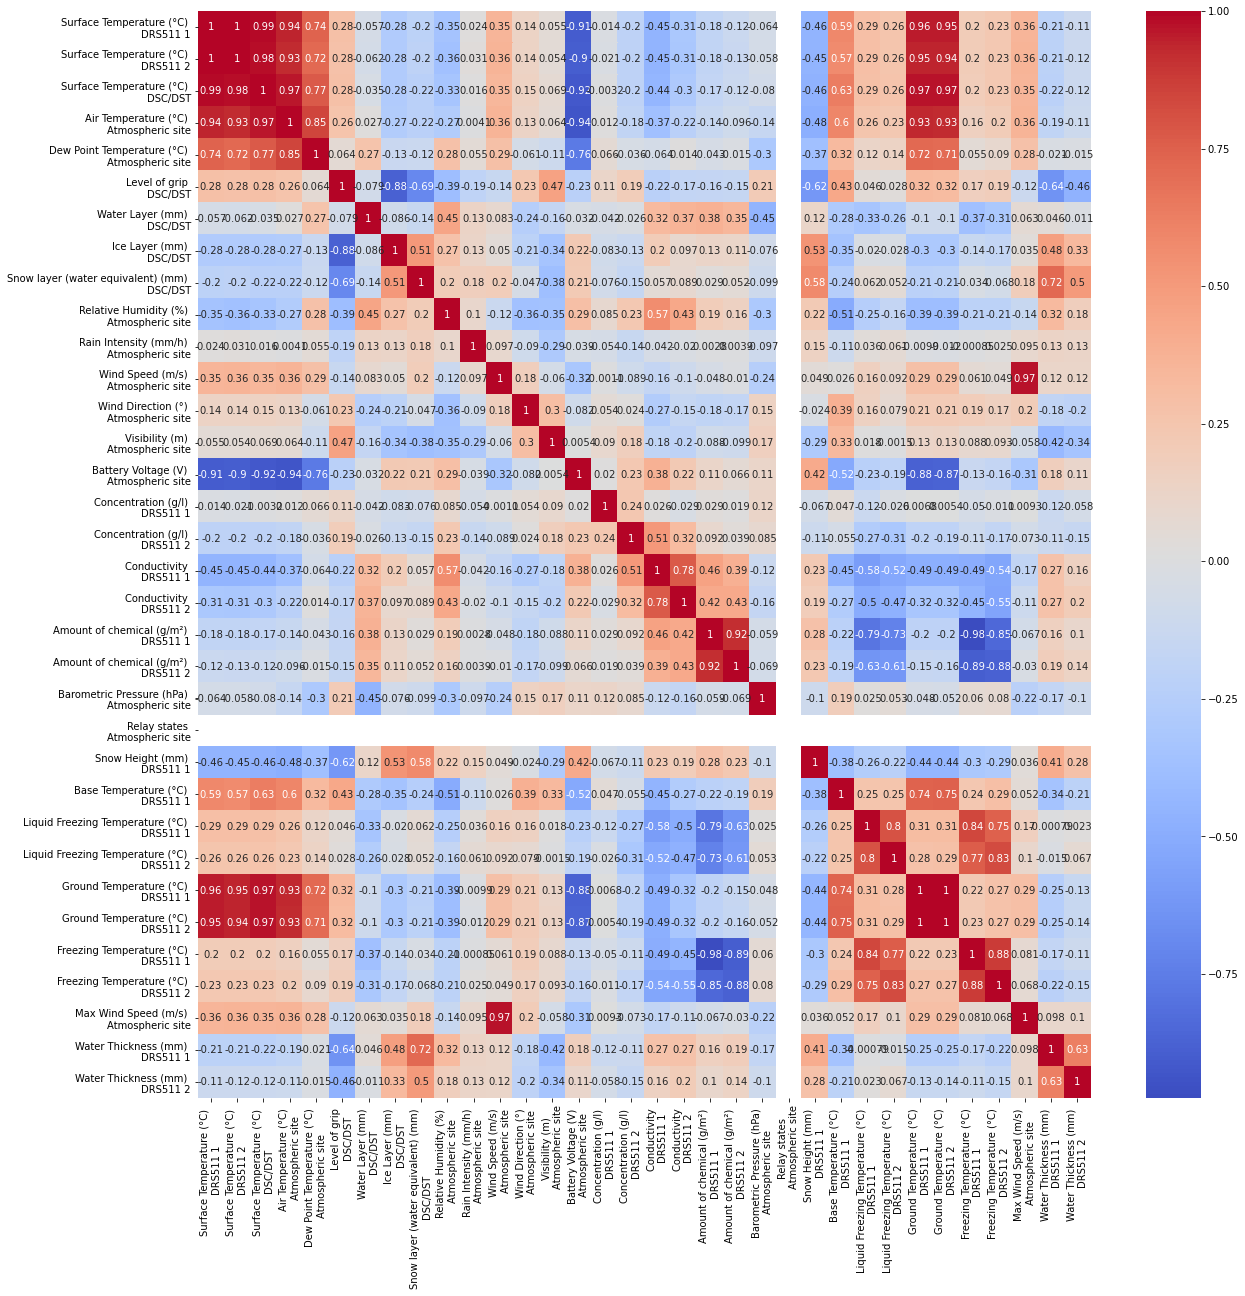

In [29]:
corrmat = data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corrmat,cmap ="coolwarm", annot=True)

In [30]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = correlation(data, 0.8)
len(set(corr_features))

13

In [32]:
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Ground Temperature (°C) \nDRS511 2,Ground Temperature (°C) \nDRS511 1,0.999143
1,Ground Temperature (°C) \nDRS511 1,Ground Temperature (°C) \nDRS511 2,0.999143
2,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDRS511 2,0.997170
3,Surface Temperature (°C) \nDRS511 2,Surface Temperature (°C) \nDRS511 1,0.997170
4,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDSC/DST,0.991433


In [33]:
grouped_feature_Is = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_Is:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_Is = grouped_feature_Is + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(data.shape[1]))

found 6 correlated groups
out of 34 total features


In [34]:
for group in correlated_groups:
    print(group)
    print()

                              feature1  \
0   Ground Temperature (°C) \nDRS511 2   
12  Ground Temperature (°C) \nDRS511 2   
21  Ground Temperature (°C) \nDRS511 2   
24  Ground Temperature (°C) \nDRS511 2   
32  Ground Temperature (°C) \nDRS511 2   
54  Ground Temperature (°C) \nDRS511 2   
78  Ground Temperature (°C) \nDRS511 2   
93  Ground Temperature (°C) \nDRS511 2   

                                         feature2      corr  
0              Ground Temperature (°C) \nDRS511 1  0.999143  
12             Surface Temperature (°C) \nDSC/DST  0.970716  
21            Surface Temperature (°C) \nDRS511 1  0.954000  
24            Surface Temperature (°C) \nDRS511 2  0.943118  
32        Air Temperature (°C) \nAtmospheric site  0.929074  
54         Battery Voltage (V) \nAtmospheric site  0.870903  
78               Base Temperature (°C) \nDRS511 1  0.746292  
93  Dew Point Temperature (°C) \nAtmospheric site  0.713025  

                                feature1  \
8   Freezing Tempe

In [35]:
scaler = RobustScaler()

In [36]:
scaler.fit(data)

RobustScaler()

In [37]:
data_scaled = scaler.transform(data)

In [39]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [40]:
data_scaled.describe()

,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDRS511 2,Surface Temperature (°C) \nDSC/DST,Air Temperature (°C) \nAtmospheric site,Dew Point Temperature (°C) \nAtmospheric site,Level of grip \nDSC/DST,Water Layer (mm) \nDSC/DST,Ice Layer (mm) \nDSC/DST,Snow layer (water equivalent) (mm) \nDSC/DST,Relative Humidity (%) \nAtmospheric site,...,Base Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 2,Ground Temperature (°C) \nDRS511 1,Ground Temperature (°C) \nDRS511 2,Freezing Temperature (°C) \nDRS511 1,Freezing Temperature (°C) \nDRS511 2,Max Wind Speed (m/s) \nAtmospheric site,Water Thickness (mm) \nDRS511 1,Water Thickness (mm) \nDRS511 2
count,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,...,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000
mean,-0.101819,-0.060899,-0.107619,-0.230348,-0.299185,-1.463222,0.284248,0.018597,0.033669,-0.225150,...,0.022922,-0.398572,-0.395813,-0.046869,-0.054142,-0.729971,-0.428795,0.019919,0.632088,4.365822
std,0.984637,0.962738,1.017438,1.079066,0.918627,3.678572,1.096569,0.059580,0.134408,0.708998,...,0.716847,1.602950,1.461207,0.917203,0.924303,3.054064,1.865272,0.676152,2.206135,21.955652
min,-3.340426,-3.163265,-3.547619,-4.760870,-3.981132,-17.500000,-0.454545,0.000000,0.000000,-2.300000,...,-1.551724,-27.333333,-23.000000,-2.951220,-3.025000,-42.000000,-20.600000,-1.333333,-0.333333,0.000000
25%,-0.531915,-0.510204,-0.523810,-0.586957,-0.622642,-0.750000,-0.454545,0.000000,0.000000,-0.700000,...,-0.482759,-0.666667,-0.666667,-0.463415,-0.475000,-0.800000,-0.600000,-0.512821,-0.333333,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.468085,0.489796,0.476190,0.413043,0.377358,0.250000,0.545455,0.000000,0.000000,0.300000,...,0.517241,0.333333,0.333333,0.536585,0.525000,0.200000,0.400000,0.487179,0.666667,1.000000
max,2.787234,2.897959,2.500000,1.847826,0.849057,0.250000,16.000000,0.510000,1.000000,0.700000,...,1.620690,0.333333,0.444444,2.317073,2.350000,0.200000,0.500000,2.487179,31.000000,310.000000


In [41]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(data_scaled, 0.8)
len(set(corr_features))

13

In [44]:
corrmat = data_scaled.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Ground Temperature (°C) \nDRS511 2,Ground Temperature (°C) \nDRS511 1,0.999143
1,Ground Temperature (°C) \nDRS511 1,Ground Temperature (°C) \nDRS511 2,0.999143
2,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDRS511 2,0.997170
3,Surface Temperature (°C) \nDRS511 2,Surface Temperature (°C) \nDRS511 1,0.997170
4,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDSC/DST,0.991433


In [45]:
grouped_feature_Is = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_Is:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_Is = grouped_feature_Is + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(data.shape[1]))

found 6 correlated groups
out of 34 total features


In [46]:
for group in correlated_groups:
    print(group)
    print()

                              feature1  \
0   Ground Temperature (°C) \nDRS511 2   
12  Ground Temperature (°C) \nDRS511 2   
21  Ground Temperature (°C) \nDRS511 2   
24  Ground Temperature (°C) \nDRS511 2   
32  Ground Temperature (°C) \nDRS511 2   
54  Ground Temperature (°C) \nDRS511 2   
78  Ground Temperature (°C) \nDRS511 2   
93  Ground Temperature (°C) \nDRS511 2   

                                         feature2      corr  
0              Ground Temperature (°C) \nDRS511 1  0.999143  
12             Surface Temperature (°C) \nDSC/DST  0.970716  
21            Surface Temperature (°C) \nDRS511 1  0.954000  
24            Surface Temperature (°C) \nDRS511 2  0.943118  
32        Air Temperature (°C) \nAtmospheric site  0.929074  
54         Battery Voltage (V) \nAtmospheric site  0.870903  
78               Base Temperature (°C) \nDRS511 1  0.746292  
93  Dew Point Temperature (°C) \nAtmospheric site  0.713025  

                                feature1  \
8   Freezing Tempe

In [6]:
data_grip = pd.read_excel('gripnos.xlsx')
data_grip.head()

,Ice layer,Snow layer (water equivalent) (mm) \nDSC/DST,Water Thickness (mm) \nDRS511 1,Snow Height (mm) \nDRS511 1,Level of grip \nDSC/DST
0,0.0,0.0,0.09,1,0.8
1,0.0,0.0,0.09,1,0.8
2,0.0,0.0,0.09,1,0.8
3,0.0,0.0,0.09,1,0.8
4,0.0,0.0,0.09,1,0.8
